Profiles information saved to profiles_information.xlsx


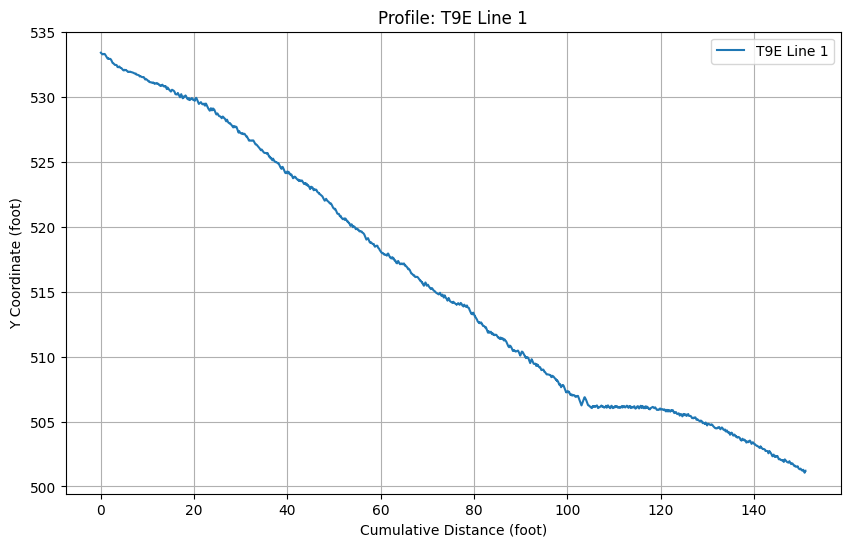

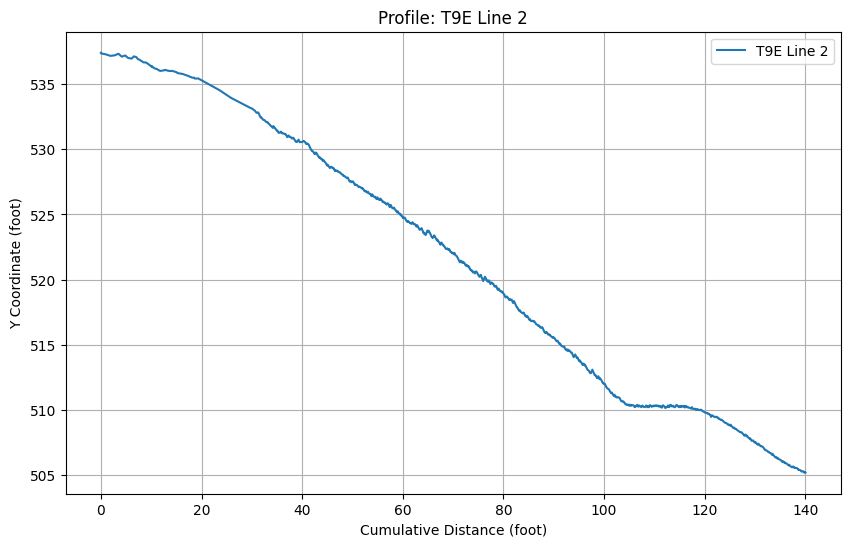

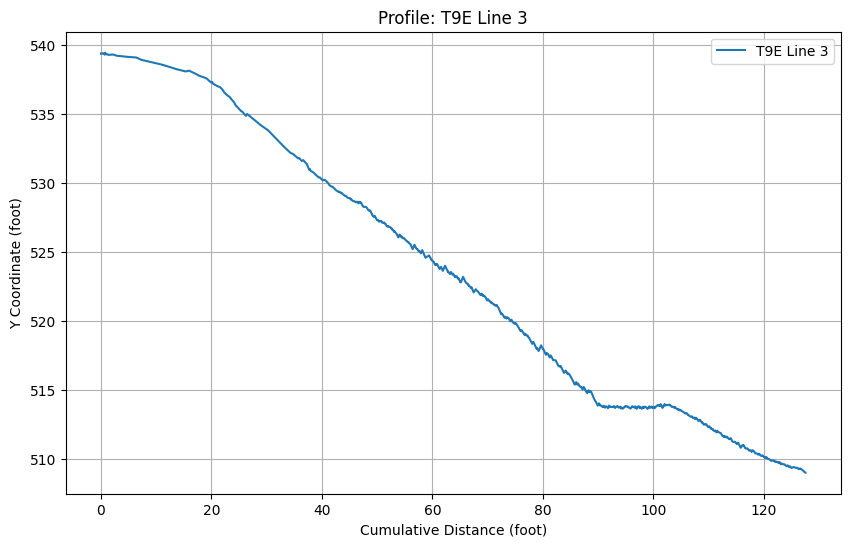

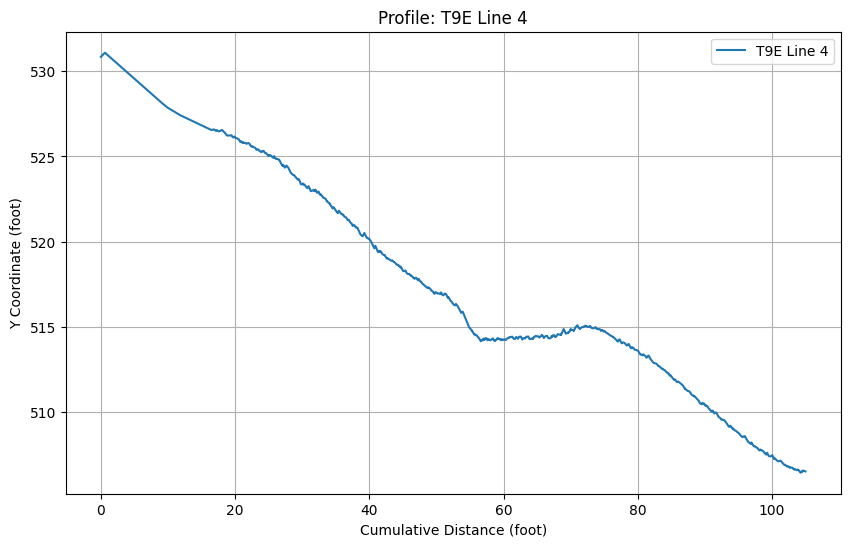

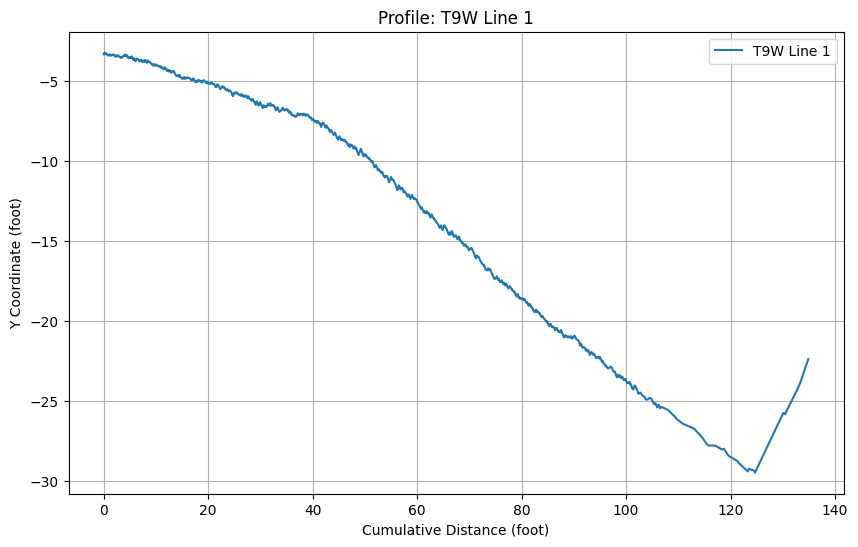

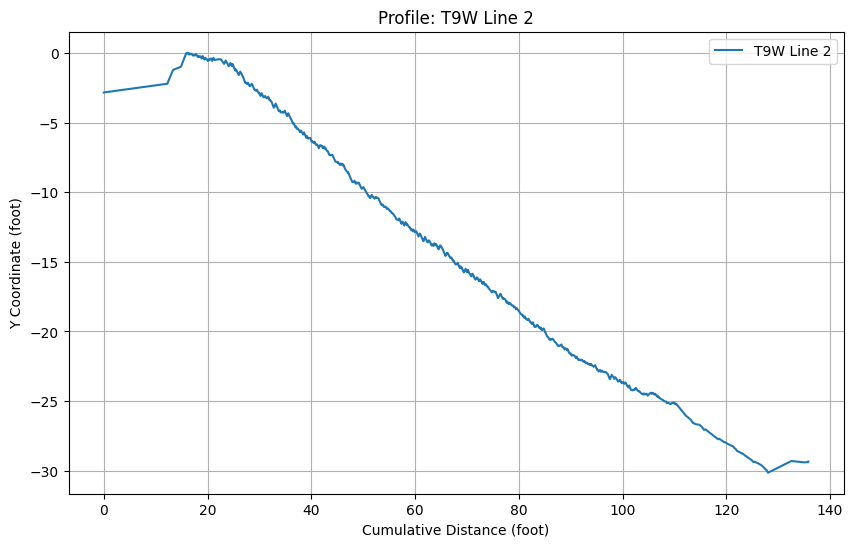

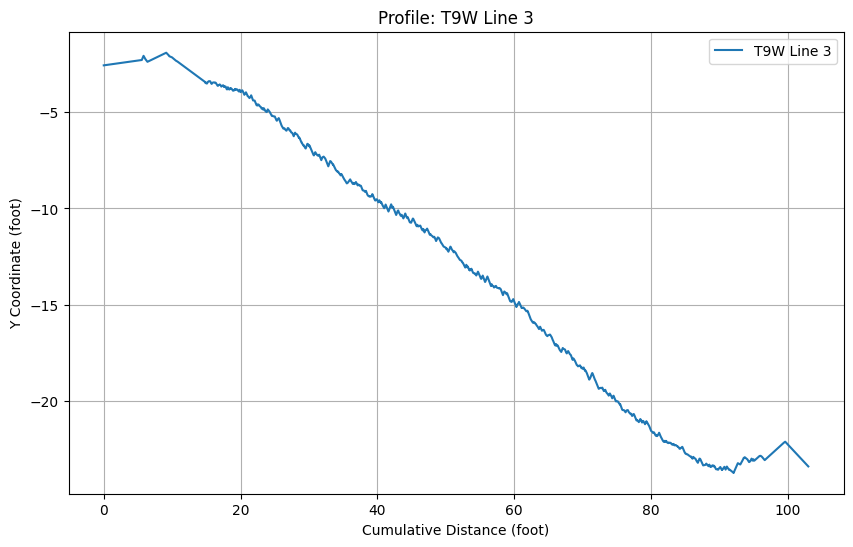

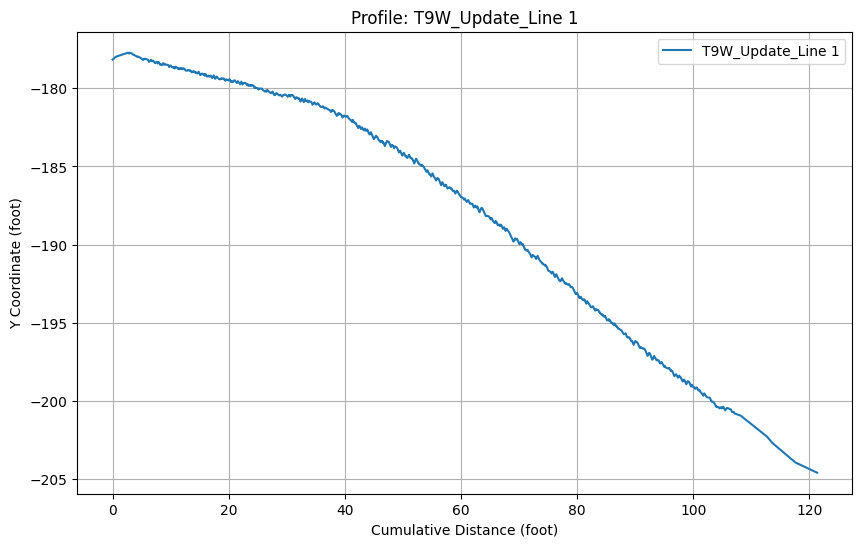

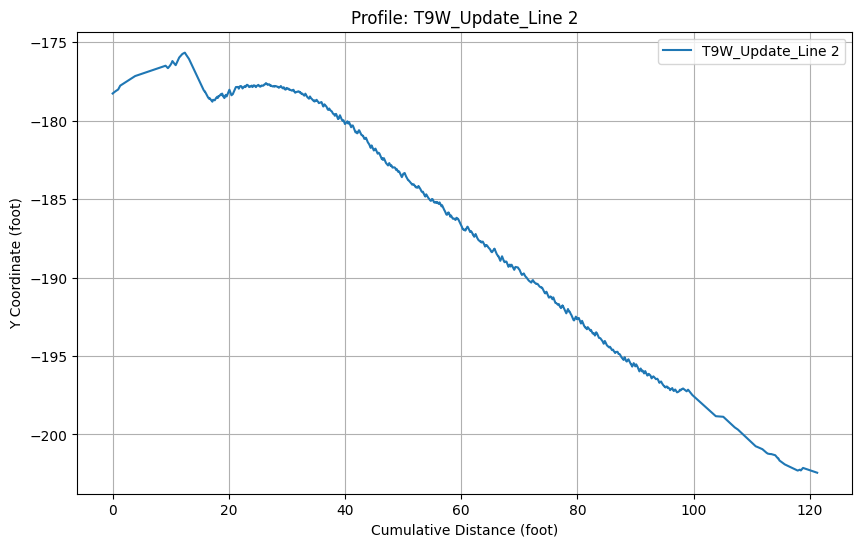

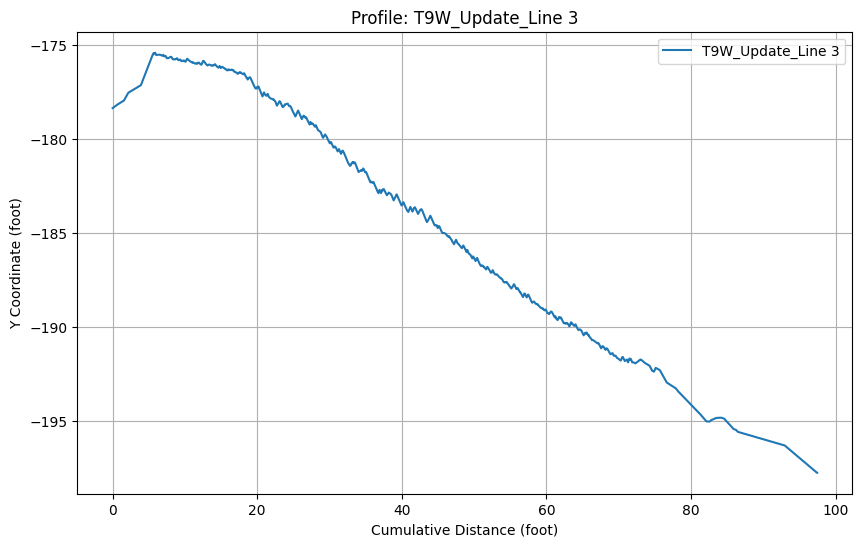

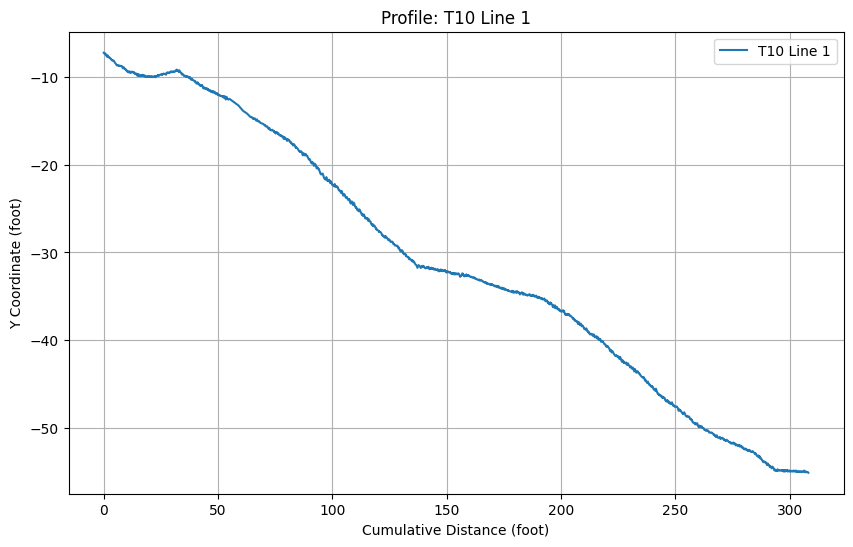

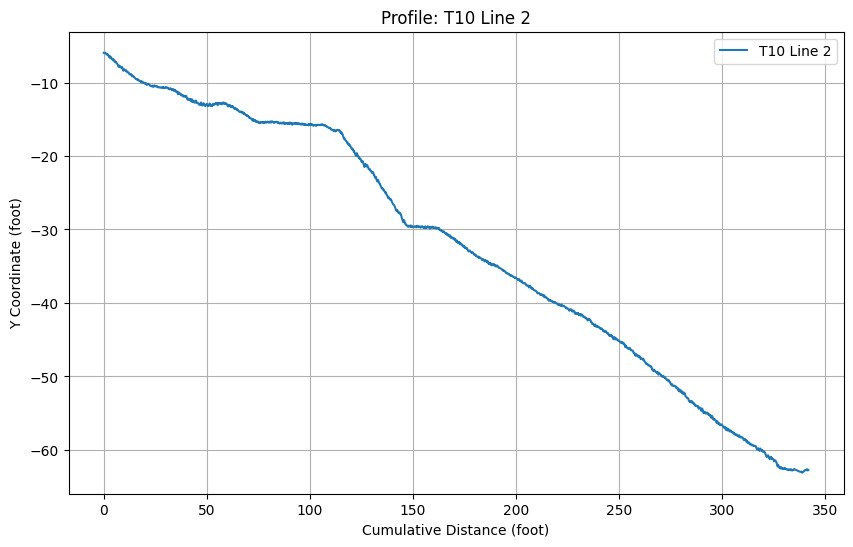

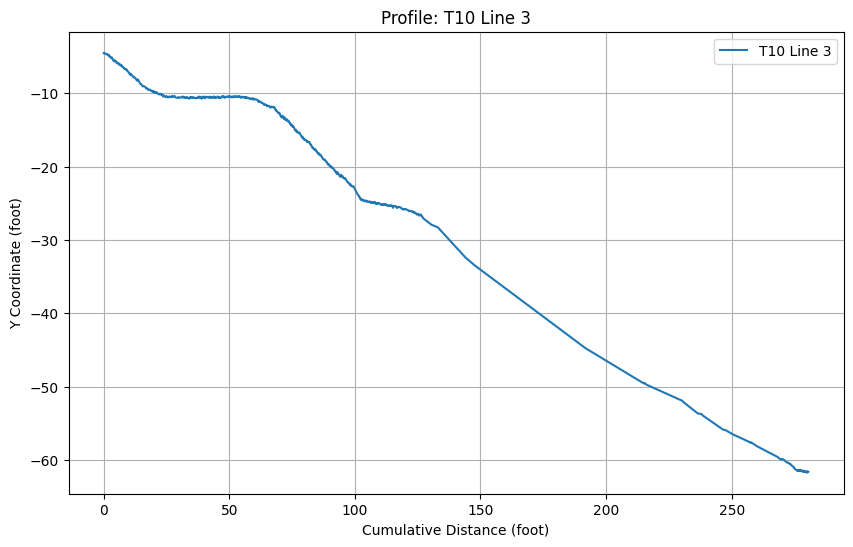

In [2]:
import xml.etree.ElementTree as ET
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
from math import sqrt

# Load the XML file
file_path = r"E:\OneDrive\JSU\02 Areas\05 Site Monitoring\Bangladesh\Report\Aloka\Aloka.xml"
tree = ET.parse(file_path)
root = tree.getroot()

# Extract namespaces
namespaces = {'ns': 'http://www.landxml.org/schema/LandXML-1.2'}

# Extract profiles information
profiles = {}
for profile in root.findall('.//ns:Profile', namespaces):
    profile_name = profile.get('name')
    surface_name = profile.find('.//ns:ProfSurf', namespaces).get('name')
    state = profile.find('.//ns:ProfSurf', namespaces).get('state')
    pnt_list_2d = profile.find('.//ns:ProfSurf/ns:PntList2D', namespaces).text.strip().split()
    
    x_points = [float(pnt_list_2d[i]) for i in range(0, len(pnt_list_2d), 2)]
    y_points = [float(pnt_list_2d[i + 1]) for i in range(0, len(pnt_list_2d), 2)]
    
    profiles[profile_name] = {
        'Surface Name': surface_name,
        'State': state,
        'X': x_points,
        'Y': y_points
    }

# Create a new workbook and set active worksheet
wb = openpyxl.Workbook()
ws = wb.active

# Write profiles information to Excel
column_index = 1
for profile_name, data in profiles.items():
    col_A = openpyxl.utils.get_column_letter(column_index)
    col_B = openpyxl.utils.get_column_letter(column_index + 1)
    
    ws[f'{col_A}1'] = data['Surface Name']
    ws[f'{col_B}1'] = data['Surface Name']
    
    ws[f'{col_A}2'] = profile_name
    ws[f'{col_B}2'] = profile_name
    
    for i, (x, y) in enumerate(zip(data['X'], data['Y']), start=3):
        ws[f'{col_A}{i}'] = x
        ws[f'{col_B}{i}'] = y
    
    column_index += 2

# Save the workbook
output_file = 'profiles_information.xlsx'
wb.save(output_file)
print(f"Profiles information saved to {output_file}")

# Function to calculate cumulative distance and plot profiles
def plot_profile_corrected(profile_name, profile_data):
    x_coords = profile_data['X']
    y_coords = profile_data['Y']
    
    # Calculate cumulative distance for the X-axis
    distances = [0]
    for i in range(1, len(x_coords)):
        dist = sqrt((x_coords[i] - x_coords[i-1])**2 + (y_coords[i] - y_coords[i-1])**2)
        distances.append(distances[-1] + dist)
    
    plt.figure(figsize=(10, 6))
    plt.plot(distances, y_coords, label=profile_name,font_size = 18)
    plt.xlabel('Cumulative Distance (m)')
    plt.ylabel('Y Coordinate (m)')
    plt.title(f'Profile: {profile_name}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"{profile_name}.png")  # Save the plot as a PNG file
    plt.show()

# Plot each profile in a separate graph with corrected X-axis
for profile_name, data in profiles.items():
    plot_profile_corrected(profile_name, data)